**Dveloped and Edited by: Dr. Muhammad Kashif Hanif**

**IPCA**
Dated: 30.08.2021



**Executed by: Shaeela Ayesha**

---



https://www.kaggle.com/shivam04/chest-xray-cnn-data-prepration/notebook

Models building link

https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

**Dataset Information**

Images 357 of type PNJ/ JPEG


Metadata file
and 
An annotation file 


In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 29.3 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 271 kB 46.4 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 14.6 MB 80 kB/s 
     |████████████████████████████████| 6.8 MB 50.5 MB/s 
     |████████████████████████████████| 1.7 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 52.5 MB/s 
     |████████████████████████████████| 167 kB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
     |████████████████████████████████| 2.0 MB 29.6 MB/s 
     |████████████████████████████████| 111 kB 60.8 MB/s 
     |████████████████████████████████| 102 kB 57.5 MB/s 
     |████████████████████████████████| 62 kB 895 kB/s 
     |████████████████████

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Covid-19-X-ray-data/metadata.csv')
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,22-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,25-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,27-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,28-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,25-Jan-20,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date',
       'location', 'folder', 'filename', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 28'],
      dtype='object')

In [ ]:
tab_data = df[['offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'modality']]

In [ ]:
def count_na(tab_data, col):
    return df[col].isna().sum()

In [ ]:
tab_data['finding'] = tab_data['finding'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tab_data['label'] = tab_data['finding'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
finding_to_label = {}
label_to_finding = {}
for _,row in tab_data.iterrows():
  finding_to_label[row['finding']] = row['label']
  label_to_finding[row['label']] = row['finding']

In [ ]:
finding_to_label

{'COVID-19': 0,
 'COVID-19, ARDS': 1,
 'Pneumocystis': 2,
 'SARS': 3,
 'Streptococcus': 4}

In [ ]:
label_to_finding

{0: 'COVID-19',
 1: 'COVID-19, ARDS',
 2: 'Pneumocystis',
 3: 'SARS',
 4: 'Streptococcus'}

In [ ]:
tab_data['label'].value_counts()

0    275
4     16
3     16
2     15
1     12
Name: label, dtype: int64

In [ ]:
##**Drop the finding colums and use Label a target**

tab_data = tab_data.drop(['finding'], axis=1)

In [ ]:
count_na(tab_data,'sex')

42

In [ ]:
tab_data ['sex'] = tab_data['sex'].fillna('M')
tab_data['sex']

0      M
1      M
2      M
3      M
4      F
      ..
329    M
330    M
331    M
332    M
333    M
Name: sex, Length: 334, dtype: object

In [ ]:
tab_data['sex'] = tab_data['sex'].astype('category').cat.codes  
tab_data['offset'] = tab_data['offset'].astype('category').cat.codes
tab_data['age'] = tab_data['age'].astype('category').cat.codes
tab_data ['survival'] = tab_data['survival'].astype('category').cat.codes
tab_data['intubated'] = tab_data['intubated'].astype('category').cat.codes
tab_data['intubation_present'] = tab_data['intubation_present'].astype('category').cat.codes
tab_data['went_icu'] = tab_data['went_icu'].astype('category').cat.codes
tab_data['needed_supplemental_O2'] = tab_data['needed_supplemental_O2'].astype('category').cat.codes
tab_data['extubated'] = tab_data['extubated'].astype('category').cat.codes
tab_data['temperature'] = tab_data['temperature'].astype('category').cat.codes
tab_data['pO2_saturation'] = tab_data['pO2_saturation'].astype('category').cat.codes
tab_data['leukocyte_count'] = tab_data['leukocyte_count'].astype('category').cat.codes
tab_data['neutrophil_count'] = tab_data['neutrophil_count'].astype('category').cat.codes
tab_data['lymphocyte_count'] = tab_data['lymphocyte_count'].astype('category').cat.codes
tab_data['in_icu'] = tab_data['in_icu'].astype('category').cat.codes
tab_data ['view'] = tab_data['view'].astype('category').cat.codes
tab_data ['modality'] = tab_data['modality'].astype('category').cat.codes
tab_data.head()

,offset,sex,age,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,label
0,1,1,34,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,6,1,0
1,4,1,34,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,6,1,0
2,6,1,34,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,6,1,0
3,7,1,34,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,6,1,0
4,1,0,22,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,6,1,0


In [ ]:
tab_data.shape

(334, 18)

In [ ]:
## 15.07.2021 Clasification report with ML model

from pycaret.classification import *
exp=setup(data=tab_data, target= 'label', pca = True, pca_method='kernel')

,Description,Value
0,session_id,991
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(334, 18)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8674,0.3287,0.4663,0.8045,0.8326,0.3564,0.3804,0.476
et,Extra Trees Classifier,0.8672,0.3341,0.4802,0.8103,0.8347,0.3768,0.4151,0.461
lr,Logistic Regression,0.8543,0.2219,0.2300,0.7303,0.7874,0.0000,0.0000,0.301
ridge,Ridge Classifier,0.8543,0.0000,0.2300,0.7303,0.7874,0.0000,0.0000,0.014
qda,Quadratic Discriminant Analysis,0.8543,0.2129,0.3155,0.7567,0.8019,0.1591,0.1853,0.020
lightgbm,Light Gradient Boosting Machine,0.8504,0.3123,0.4478,0.7877,0.8142,0.3033,0.3265,0.151
gbc,Gradient Boosting Classifier,0.8455,0.3432,0.4312,0.7892,0.8128,0.2746,0.2895,0.451
svm,SVM - Linear Kernel,0.8370,0.0000,0.2250,0.7318,0.7802,0.0013,0.0012,0.065
knn,K Neighbors Classifier,0.8284,0.2790,0.2558,0.7421,0.7823,0.0554,0.0601,0.115
dt,Decision Tree Classifier,0.8152,0.2471,0.4662,0.7977,0.8023,0.2828,0.2908,0.016


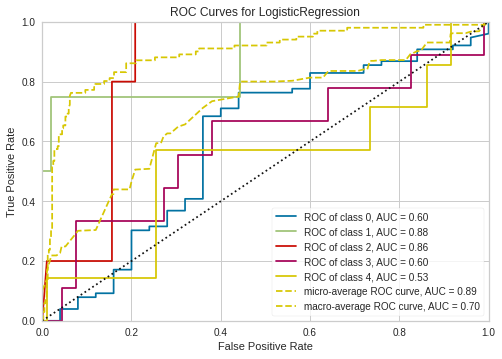

In [ ]:
lr=create_model('lr')
tuned_lr = tune_model(lr)
plot_model(lr)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

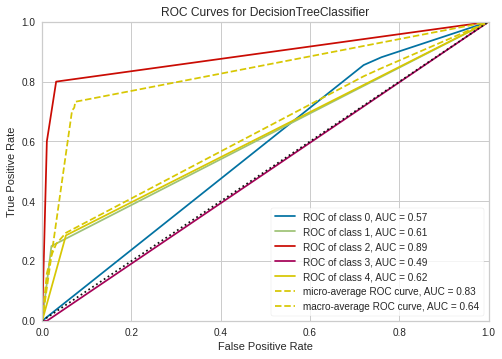

In [ ]:
dt=create_model('dt')
tuned_dt = tune_model(dt)
plot_model(dt)

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
svm=create_model('svm')
tuned_svm = tune_model(svm)
#plot_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.0,0.2000,0.6944,0.7576,0.0,0.0
1,0.8333,0.0,0.2000,0.6944,0.7576,0.0,0.0
2,0.8333,0.0,0.2000,0.6944,0.7576,0.0,0.0
3,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
4,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
5,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
6,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
7,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
8,0.8696,0.0,0.2500,0.7561,0.8089,0.0,0.0
9,0.8261,0.0,0.2000,0.6824,0.7474,0.0,0.0


In [ ]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_knn)

NameError: ignored

In [ ]:
#blending 3 models
blend = blend_models(estimator_list=[tuned_lr,knn,nb])